# Clustering

## Data Prep

In [1]:
import pandas as pd

df = pd.read_csv('Data/entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [2]:
# Checks
# 1. Right row granularity
# 2. Columns are non-null
# 3. Columns are numeric
# 4. Feature engineering
# 5. Feature selection
# 6. Feature scaling

In [3]:
df.shape

(150, 4)

In [4]:
df.name.nunique()

150

In [5]:
df[df.isna().any(axis=1)]

,name,books,tv_shows,video_games


In [6]:
df.dtypes

name            object
books          float64
tv_shows       float64
video_games    float64
dtype: object

In [7]:
data = df.drop(columns=['name'])
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [8]:
data.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


## 1. K-Means Clustering

In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


#The code above fixes the following warning:

#C:\Users\Camilo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
#  warnings.warn(

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)

In [12]:
kmeans2.fit(data) # Initializes clustering logic

KMeans(n_clusters=2, random_state=42)

In [13]:
kmeans2.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

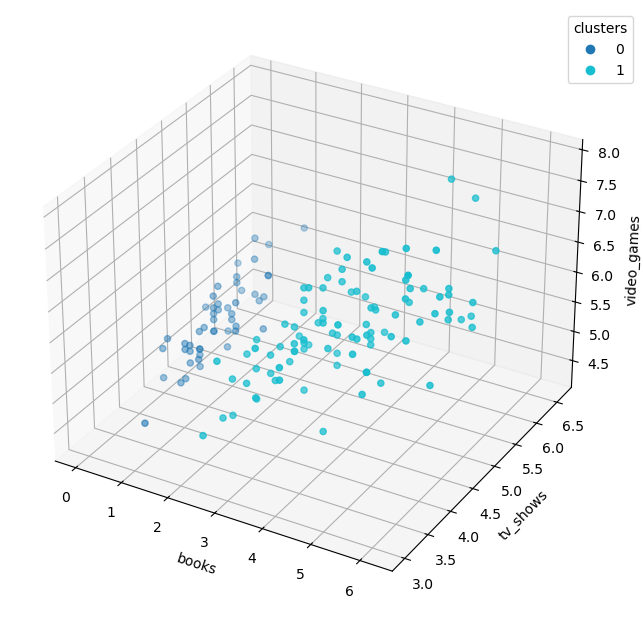

In [14]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# combine the data and cluster labels
cluster_labels = pd.Series(kmeans2.labels_, name='cluster')

# create a clean dataframe
df_clean = pd.concat([data, cluster_labels], axis=1)

# create a 3d scatter plot
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

# specify the data and labels
sc = ax.scatter(df_clean['books'], df_clean['tv_shows'], df_clean['video_games'],
                c=df_clean['cluster'], cmap='tab10')
ax.set_xlabel('books')
ax.set_ylabel('tv_shows')
ax.set_zlabel('video_games')

# add a legend
plt.legend(*sc.legend_elements(), title='clusters',
           bbox_to_anchor=(1.05, 1));

In [15]:
# Start interpretation
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [16]:
data.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

In [17]:
kmeans2.cluster_centers_

array([[0.596, 5.13 , 5.006],
       [4.192, 4.314, 6.262]])

In [18]:
data.mean()

books          2.993333
tv_shows       4.586000
video_games    5.843333
dtype: float64

In [19]:
# Cluster 0: [0.596, 5.13 , 5.006]  ~ non-readers
# Cluster 1: [4.192, 4.314, 6.262]  ~ entertainment enthusiasts

In [20]:
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)

In [21]:
kmeans3.fit(data)

KMeans(n_clusters=3, random_state=42)

In [22]:
kmeans3.labels_

array([0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0])

In [23]:
kmeans3.cluster_centers_

array([[0.596     , 5.13      , 5.006     ],
       [5.14375   , 4.52708333, 6.63958333],
       [3.31346154, 4.11730769, 5.91346154]])

In [24]:
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data.columns)
cluster_centers3

,books,tv_shows,video_games
0,0.596000,5.130000,5.006000
1,5.143750,4.527083,6.639583
2,3.313462,4.117308,5.913462


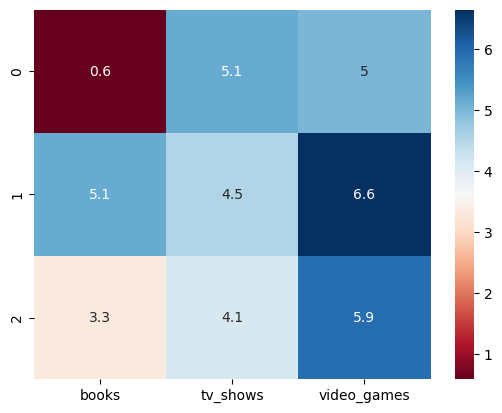

In [25]:
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

In [26]:
# Cluster 0: non-readers
# Cluster 1: entertainment enthusiasts
# Cluster 2: prefer video games over books

## Inertia Plot

In [27]:
kmeans2.inertia_

206.44200000000004

In [28]:
kmeans3.inertia_

105.47568525641027

In [29]:
# Goal: Fit kmeans 2-15 clusters

In [30]:
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data)
kmeans2.inertia_

206.44200000000004

In [31]:
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data)
kmeans3.inertia_

105.47568525641027

In [32]:
inertia_values = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    #print(kmeans.inertia_)
    inertia_values.append(kmeans.inertia_)

In [33]:
inertia_values

[206.44200000000004,
 105.47568525641027,
 93.51530906593402,
 70.15778305028302,
 60.404557575757586,
 55.951117989001645,
 55.52002215876229,
 45.48421550671551,
 42.53241376678876,
 37.06426802364302,
 35.84139714452214,
 35.114057400932396,
 32.7026974251239,
 30.524871794871782]

In [34]:
import matplotlib.pyplot as plt

In [35]:
inertia_series = pd.Series(inertia_values, index=range(2,16))

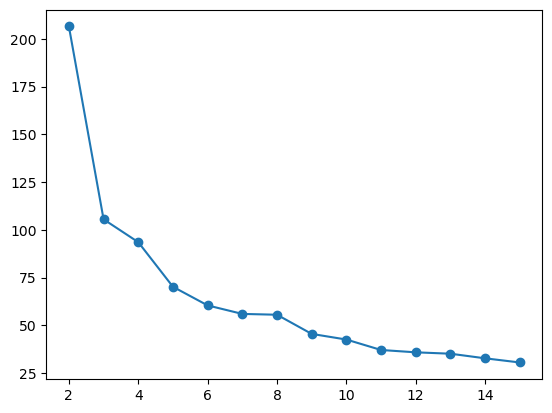

In [36]:
inertia_series.plot(marker='o');

In [37]:
# Elbows at K = 3, 5

In [38]:
kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)

In [39]:
kmeans5.fit(data)

KMeans(n_clusters=5, random_state=42)

In [40]:
kmeans5.labels_

array([3, 3, 3, 1, 2, 4, 1, 2, 3, 1, 1, 3, 3, 3, 3, 0, 1, 3, 4, 4, 1, 2,
       2, 4, 2, 1, 3, 0, 0, 4, 2, 1, 4, 1, 4, 2, 1, 3, 0, 4, 2, 2, 3, 0,
       1, 2, 3, 1, 3, 4, 4, 1, 1, 2, 1, 4, 0, 1, 2, 2, 3, 0, 3, 2, 4, 1,
       0, 2, 1, 1, 1, 4, 2, 4, 2, 1, 2, 1, 2, 1, 1, 4, 3, 3, 3, 1, 1, 3,
       0, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 3, 1, 3, 2, 2, 4, 1, 3, 4, 3, 0,
       4, 4, 3, 3, 3, 4, 1, 3, 4, 2, 1, 4, 3, 0, 3, 4, 2, 1, 1, 0, 3, 3,
       4, 0, 2, 4, 1, 1, 1, 2, 3, 3, 2, 1, 2, 4, 4, 4, 0, 3])

In [41]:
kmeans5.cluster_centers_

array([[0.68571429, 5.81428571, 5.37857143],
       [4.14871795, 4.39230769, 6.33589744],
       [3.08787879, 3.90909091, 5.65757576],
       [0.56111111, 4.86388889, 4.86111111],
       [5.55357143, 4.68214286, 6.87142857]])

In [42]:
cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=data.columns)
cluster_centers5

,books,tv_shows,video_games
0,0.685714,5.814286,5.378571
1,4.148718,4.392308,6.335897
2,3.087879,3.909091,5.657576
3,0.561111,4.863889,4.861111
4,5.553571,4.682143,6.871429


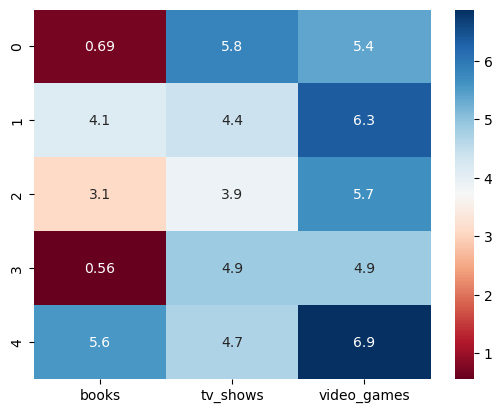

In [43]:
sns.heatmap(cluster_centers5, cmap='RdBu', annot=True);

In [44]:
#------------ new ---------------------
# Cluster 0 and 3: non-reader
# Cluster 1 and 2: Prefer videogames to books
# Cluster 4: entertainment enthusiastsb

#------------ old ---------------------
# Cluster 0: non-readers
# Cluster 1: entertainment enthusiasts
# Cluster 2: prefer video games over books

## Tune the K-Means Model

In [45]:
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [46]:
data_v2 = pd.read_pickle('Data/entertainment_data_for_modeling.pkl')
data_v2.head()

entertainment,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-1.360056,1.384262
1,-0.294884,-1.551591,1.918235
2,-0.294884,-1.336114,1.388865
3,-0.294884,0.435582,-0.344126
4,-0.294884,-0.258731,-0.217658


In [47]:
inertia_values_v2 = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_v2)
    inertia_values_v2.append(kmeans.inertia_)

In [48]:
inertia_values_v2

[204.3306995303364,
 48.768491002597074,
 23.081405817631225,
 19.96974534696725,
 14.54420439908639,
 13.149474009661285,
 10.776480219489613,
 8.899026602409878,
 7.970325819719771,
 7.475023819085278,
 6.245887490162979,
 5.957877038771971,
 5.5330102147941265,
 5.120263895769977]

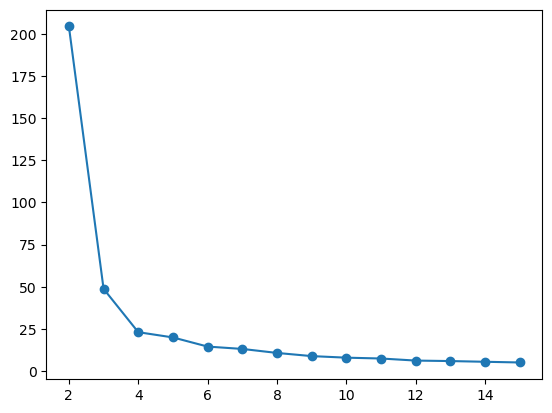

In [49]:
inertia_series_v2 = pd.Series(inertia_values_v2, index=range(2,16))
inertia_series_v2.plot(marker='o');

In [50]:
kmeans4 = KMeans(n_clusters=4, n_init='auto', random_state=42)

In [51]:
kmeans4.fit(data_v2)

KMeans(n_clusters=4, random_state=42)

In [52]:
kmeans4.labels_

array([0, 0, 0, 3, 3, 1, 1, 3, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 1, 2, 3, 3,
       3, 1, 3, 1, 0, 0, 0, 2, 3, 2, 1, 1, 1, 3, 3, 0, 0, 1, 3, 3, 0, 0,
       1, 3, 0, 1, 0, 2, 2, 1, 3, 3, 3, 1, 0, 1, 3, 3, 0, 0, 0, 3, 1, 2,
       0, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 0, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 2, 3, 1, 3, 0, 1, 0, 3, 3, 2, 3, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 1, 3, 0, 1, 3, 3, 2, 0, 0, 0, 2, 3, 3, 3, 0, 0, 0,
       1, 0, 3, 1, 1, 1, 1, 3, 0, 0, 3, 1, 3, 1, 1, 2, 0, 0])

In [53]:
kmeans4.cluster_centers_

array([[-0.29488391, -1.19389982,  1.32786949],
       [-0.29488391,  0.98757435, -1.04388409],
       [ 3.39116499,  1.53491145, -0.74383666],
       [-0.29488391,  0.11006494, -0.38245398]])

In [54]:
cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=data_v2.columns)
cluster_centers4

entertainment,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-1.193900,1.327869
1,-0.294884,0.987574,-1.043884
2,3.391165,1.534911,-0.743837
3,-0.294884,0.110065,-0.382454


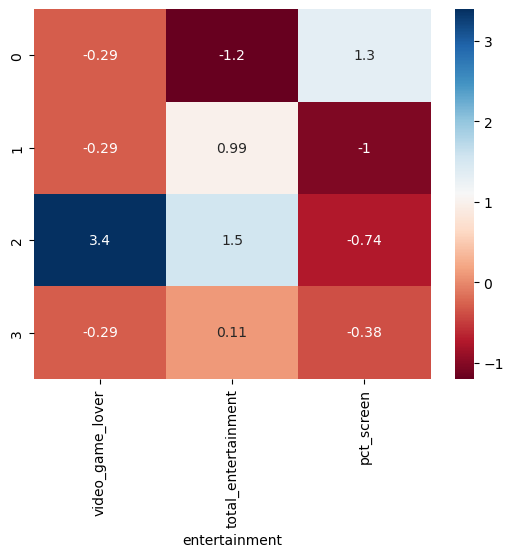

In [55]:
sns.heatmap(cluster_centers4, cmap='RdBu', annot=True);

In [56]:
# Cluster 0: -Entertainment, -Books.
# Cluster 1: +Books, -Screens.
# Cluster 2: +Entertainment, +video games.
# Cluster 3: Typical students.

## Selecting the Best K-Means Model

The three clusters created from the original data set (books, tv_shows, movies):
* Cluster 0: **Non-readers**
* Cluster 1: **Entertainment enthusiasts**
* Cluster 2: **Prefer video games to books**

The four clusters created from the updated data set (video_game_lover, total_entertainment, pct_screen):
* Cluster 0: **Less entertainment, especially books**
* Cluster 1: **Prefer books to screens**
* Cluster 2: **Entertainment enthusiasts, especially video games**
* Cluster 3: **Typical students**

In [57]:
kmeans3.labels_

array([0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0])

In [58]:
kmeans4.labels_

array([0, 0, 0, 3, 3, 1, 1, 3, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 1, 2, 3, 3,
       3, 1, 3, 1, 0, 0, 0, 2, 3, 2, 1, 1, 1, 3, 3, 0, 0, 1, 3, 3, 0, 0,
       1, 3, 0, 1, 0, 2, 2, 1, 3, 3, 3, 1, 0, 1, 3, 3, 0, 0, 0, 3, 1, 2,
       0, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 0, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 2, 3, 1, 3, 0, 1, 0, 3, 3, 2, 3, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 1, 3, 0, 1, 3, 3, 2, 0, 0, 0, 2, 3, 3, 3, 0, 0, 0,
       1, 0, 3, 1, 1, 1, 1, 3, 0, 0, 3, 1, 3, 1, 1, 2, 0, 0])

In [59]:
model1_clusters = pd.Series(kmeans3.labels_, name='model1_clusters')
model1_names = model1_clusters.map({
    0: 'Non-readers',
    1: 'Entertainment enthusiasts',
    2: 'Prefer video games to books'
})

model1_names.head()

0                    Non-readers
1                    Non-readers
2                    Non-readers
3    Prefer video games to books
4    Prefer video games to books
Name: model1_clusters, dtype: object

In [60]:
model2_clusters = pd.Series(kmeans4.labels_, name='model2_clusters')
model2_names = model2_clusters.map({
    0: 'Less entertainment, especially books',
    1: 'Prefer books to screens',
    2: 'Entertainment enthusiasts, especially video games',
    3: 'Typical students'
})

model2_names.head()

0    Less entertainment, especially books
1    Less entertainment, especially books
2    Less entertainment, especially books
3                        Typical students
4                        Typical students
Name: model2_clusters, dtype: object

In [61]:
model1_names.value_counts()

model1_clusters
Prefer video games to books    52
Non-readers                    50
Entertainment enthusiasts      48
Name: count, dtype: int64

In [62]:
model2_names.value_counts()

model2_clusters
Typical students                                     52
Less entertainment, especially books                 50
Prefer books to screens                              36
Entertainment enthusiasts, especially video games    12
Name: count, dtype: int64

In [63]:
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [64]:
cluster_names = pd.concat([df, model1_names, model2_names], axis=1)
cluster_names.head()

,name,books,tv_shows,video_games,model1_clusters,model2_clusters
0,Aaliyah,0.5,4.6,4.9,Non-readers,"Less entertainment, especially books"
1,Abigail,0.0,4.5,4.8,Non-readers,"Less entertainment, especially books"
2,Addison,0.5,4.5,5.0,Non-readers,"Less entertainment, especially books"
3,Adeline,3.5,4.5,6.6,Prefer video games to books,Typical students
4,Alana,2.8,3.8,5.6,Prefer video games to books,Typical students


In [65]:
(cluster_names.groupby(['model1_clusters', 'model2_clusters'])
 [['books', 'tv_shows', 'video_games']]
 .mean())

books  \
model1_clusters             model2_clusters                                               
Entertainment enthusiasts   Entertainment enthusiasts, especially video games  5.125000   
                            Prefer books to screens                            5.150000   
Non-readers                 Less entertainment, especially books               0.596000   
Prefer video games to books Typical students                                   3.313462   

                                                                               tv_shows  \
model1_clusters             model2_clusters                                               
Entertainment enthusiasts   Entertainment enthusiasts, especially video games  4.691667   
                            Prefer books to screens                            4.472222   
Non-readers                 Less entertainment, especially books               5.130000   
Prefer video games to books Typical students                                   4.117308   

                                                                               video_games  
model1_clusters             model2_clusters                                                 
Entertainment enthusiasts   Entertainment enthusiasts, especially video games     7.475000  
                            Prefer books to screens                               6.361111  
Non-readers                 Less entertainment, especially books                  5.006000  
Prefer video games to books Typical students                                      5.913462

In [66]:
# Typical student
# Non-readers
# Entertainment enthusiasts

# Hierarchical Clustering

In [67]:
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


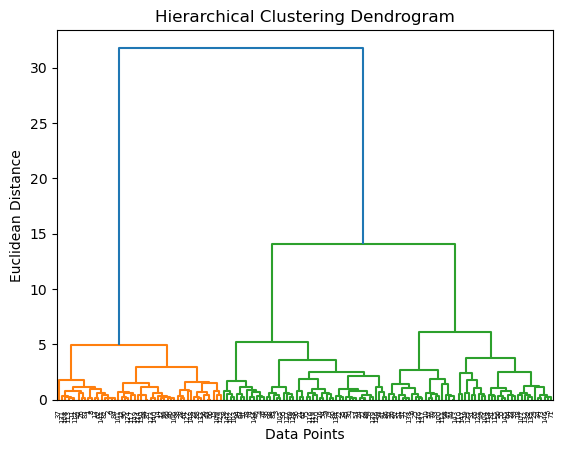

In [68]:
# Visualize the clusters with a dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance');

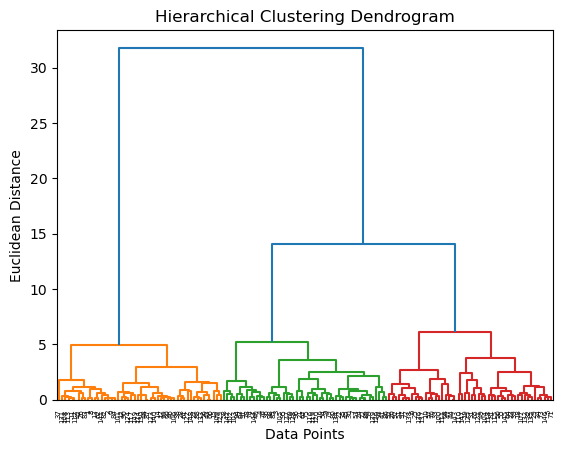

In [69]:
linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=10)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance');

## Agglomerative Clustering in Python

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
agg = AgglomerativeClustering(3)

In [72]:
agg.fit(data)

AgglomerativeClustering(n_clusters=3)

In [73]:
agg.labels_

array([1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1,
       0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1], dtype=int64)

In [74]:
from collections import Counter

In [75]:
Counter(agg.labels_)

Counter({1: 50, 2: 50, 0: 50})

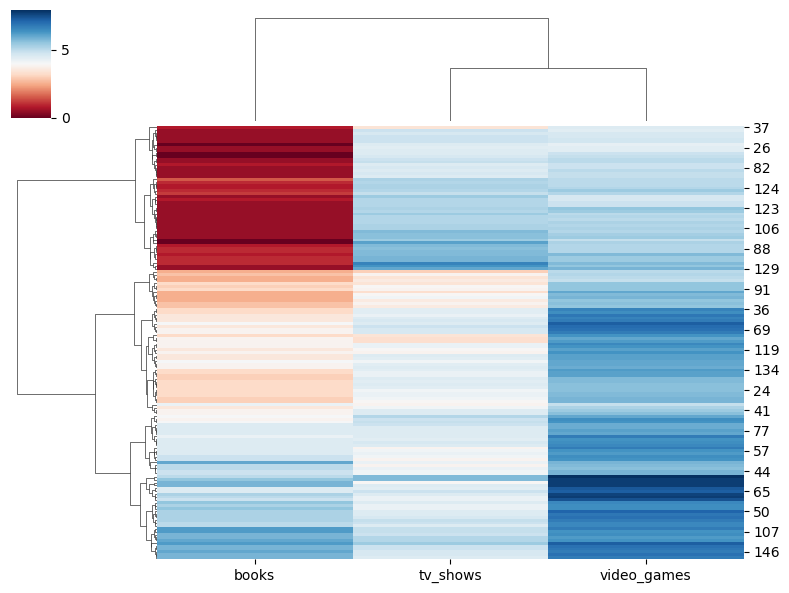

In [76]:
# Create a cluster map
clustermap = sns.clustermap(data, method='ward', cmap='RdBu', figsize=(8,6), xticklabels=data.columns)
plt.show()

* Cluster 1: -Books
* Cluster 2: Typical Students
* Cluster 3: +Video Games

In [77]:
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [78]:
data_v2.head()

entertainment,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-1.360056,1.384262
1,-0.294884,-1.551591,1.918235
2,-0.294884,-1.336114,1.388865
3,-0.294884,0.435582,-0.344126
4,-0.294884,-0.258731,-0.217658


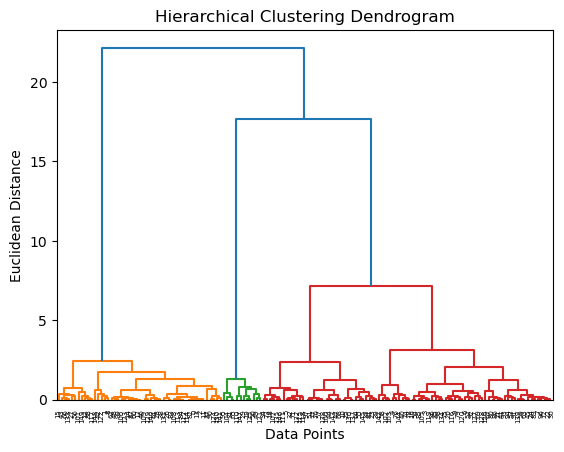

In [79]:
# Visualize the clusters with a dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data_v2, method='ward')
dendrogram_info = dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance');

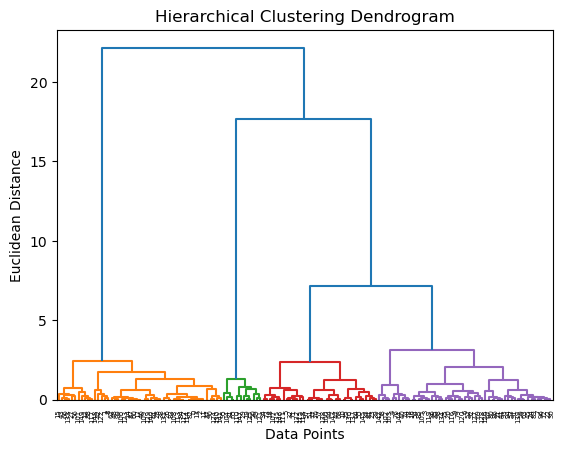

In [80]:
linkage_matrix = linkage(data_v2, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=5)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance');

In [81]:
agg_v2 = AgglomerativeClustering(4)
agg_v2.fit(data_v2)

AgglomerativeClustering(n_clusters=4)

In [82]:
agg_v2.labels_

array([1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 3, 2, 0, 0,
       0, 3, 0, 3, 1, 1, 1, 2, 0, 2, 3, 3, 3, 0, 0, 1, 1, 3, 0, 0, 1, 1,
       3, 0, 1, 3, 1, 2, 2, 3, 0, 0, 0, 3, 1, 3, 0, 0, 1, 1, 1, 0, 3, 2,
       1, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 2, 0, 3, 0, 1, 3, 1, 0, 0, 2, 0, 1, 3, 1, 1,
       2, 3, 1, 1, 1, 3, 0, 1, 3, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1,
       3, 1, 0, 3, 3, 3, 3, 0, 1, 1, 0, 3, 0, 3, 3, 2, 1, 1], dtype=int64)

In [83]:
Counter(agg_v2.labels_)

Counter({0: 53, 1: 50, 3: 35, 2: 12})

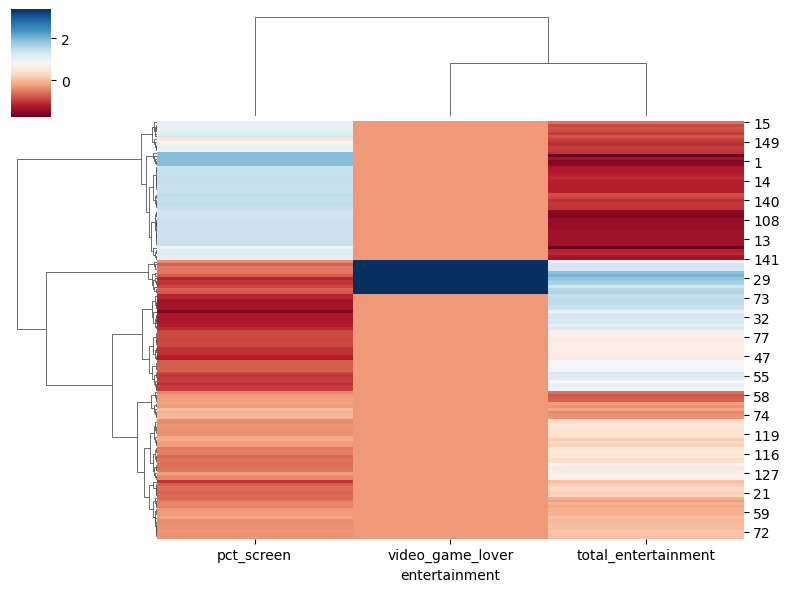

In [84]:
# Create a cluster map
clustermap_v2 = sns.clustermap(data_v2, method='ward', cmap='RdBu', figsize=(8,6), xticklabels=data_v2.columns)
plt.show()

* Cluster 1: -Entertainment
* Cluster 2: +Video Games
* Cluster 3: +Books
* Cluster 4: Typical Students

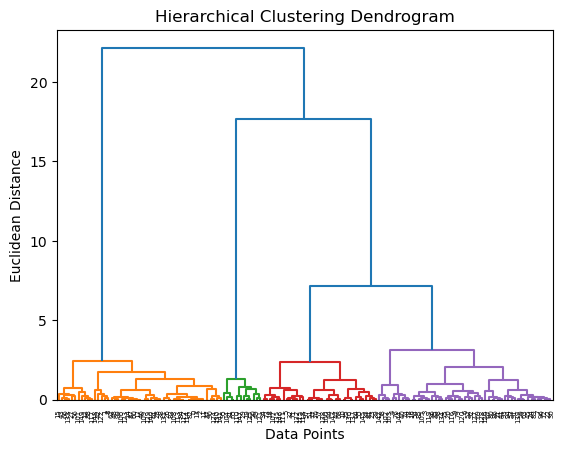

In [85]:
# Visualize the clusters with a dendrogram
linkage_matrix_v2 = linkage(data_v2, method='ward')
dendrogram_info_v2 = dendrogram(linkage_matrix_v2, color_threshold=5)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance');

In [86]:
# get the x-axis values from the dendrogram (ivl = index varliable list)
data_points = pd.Series(dendrogram_info_v2['ivl'], name='Data Point').astype('int')
data_points.head()

0     15
1     43
2     66
3    133
4     27
Name: Data Point, dtype: int32

In [87]:
# get the clusters from the dendrogram (fcluster = flat cluster)
from scipy.cluster.hierarchy import fcluster

den_clusters = pd.Series(fcluster(linkage_matrix_v2, 5, criterion='distance'), name='Dendrogram Cluster')
den_clusters

0      1
1      1
2      1
3      4
4      4
      ..
145    3
146    3
147    2
148    1
149    1
Name: Dendrogram Cluster, Length: 150, dtype: int32

In [88]:
# View the cluster assignments from the dendrogram
den_clusters_df = den_clusters.reset_index()
den_clusters_df.columns = ['Data Point', 'Dendrogram Cluster']
den_clusters_df.head()

,Data Point,Dendrogram Cluster
0,0,1
1,1,1
2,2,1
3,3,4
4,4,4


In [89]:
# View the data points within each cluster (sorted)
den_clusters_df.sort_values(['Dendrogram Cluster', 'Data Point'])

,Data Point,Dendrogram Cluster
0,0,1
1,1,1
2,2,1
8,8,1
11,11,1
...,...,...
128,128,4
134,134,4
139,139,4
142,142,4


In [90]:
# View the number of data points within each cluste
den_clusters_df['Dendrogram Cluster'].value_counts()

Dendrogram Cluster
4    53
1    50
3    35
2    12
Name: count, dtype: int64

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [91]:
from sklearn.cluster import DBSCAN

In [92]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)

DBSCAN()

In [93]:
dbscan.labels_

array([ 0, -1,  0,  1,  1,  1,  1,  1,  0,  1, -1,  0,  0,  0,  0, -1,  1,
        0,  1, -1,  1, -1,  1,  1,  1,  1,  0,  0,  0, -1,  1, -1,  1,  1,
        1,  1,  1, -1,  0,  1,  1,  1, -1,  0, -1,  1,  0, -1,  0, -1,  1,
        1, -1,  1,  1,  1,  0,  1, -1,  1,  0,  0,  0,  1,  1, -1,  0, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  0,  0,  0,
        1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1,  1,  0,  1,  0,
       -1,  1, -1,  1,  0,  1,  0, -1, -1, -1,  0,  0,  0,  1,  1,  0,  1,
        1,  1, -1, -1,  0,  0, -1, -1,  1,  1,  0,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  0,  0,  1, -1,  1,  1,  1, -1, -1,  0],
      dtype=int64)

In [94]:
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters_

2

In [95]:
# Silhouette score of the model
from sklearn.metrics import silhouette_score

silhouette_score(data, dbscan.labels_, metric='euclidean', sample_size=None)

0.34196209510111875

In [96]:
import numpy as np

results = []

# define a range of eps and min_samples values to loop through
eps_values = np.arange(.1,2,.1)
min_samples_values = np.arange(2,10,1)

# loop through the combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)
        labels = dbscan.labels_

        # Count the number of clusters (excluding noise points labeled as -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # count the number of noise points (labeled as -1)
        n_noise = list(labels).count(-1)

        # calculate the silhouette score
        if n_clusters > 1: # silhouette score requires at least 2 clusters
            silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
        else:
            silhouette = None

        results.append([eps, min_samples, n_clusters, n_noise, silhouette])

# put the results in a dataframe
dbscan_results = pd.DataFrame(results, columns=['Eps', 'Min Samples', 'Number of Clusters', 'Number of Noise Points', 'Silhouette Score'])
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,12,124,-0.438782
1,0.1,3,2,144,-0.483479
2,0.1,4,0,150,NaN
3,0.1,5,0,150,NaN
4,0.1,6,0,150,NaN


In [97]:
dbscan_results

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,12,124,-0.438782
1,0.1,3,2,144,-0.483479
2,0.1,4,0,150,NaN
3,0.1,5,0,150,NaN
4,0.1,6,0,150,NaN
...,...,...,...,...,...
147,1.9,5,1,0,NaN
148,1.9,6,1,0,NaN
149,1.9,7,1,0,NaN
150,1.9,8,1,0,NaN


In [98]:
dbscan_results.sort_values('Silhouette Score', ascending=False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
109,1.4,7,2,0,0.628673
107,1.4,5,2,0,0.628673
106,1.4,4,2,0,0.628673
105,1.4,3,2,0,0.628673
...,...,...,...,...,...
147,1.9,5,1,0,NaN
148,1.9,6,1,0,NaN
149,1.9,7,1,0,NaN
150,1.9,8,1,0,NaN


In [99]:
(dbscan_results.sort_values('Silhouette Score', ascending=False)
                 .groupby('Silhouette Score')
                 .head(1))

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
76,1.0,6,2,2,0.550831
79,1.0,9,2,3,0.528540
72,1.0,2,2,1,0.515323
57,0.8,3,2,4,0.497686
62,0.8,8,2,5,0.482653
43,0.6,5,2,12,0.480329
52,0.7,6,2,9,0.476795
41,0.6,3,2,11,0.476287
63,0.8,9,2,6,0.471959


In [100]:
def tune_dbscan(data):

    results = []
    
    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1,2,.1)
    min_samples_values = np.arange(2,10,1)
    
    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_
    
            # Count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)
    
            # calculate the silhouette score
            if n_clusters > 1: # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None
    
            results.append([eps, min_samples, n_clusters, n_noise, silhouette])
    
    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=['Eps', 'Min Samples', 'Number of Clusters', 'Number of Noise Points', 'Silhouette Score'])
    
    return dbscan_results

In [101]:
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [102]:
data_v2.head()

entertainment,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-1.360056,1.384262
1,-0.294884,-1.551591,1.918235
2,-0.294884,-1.336114,1.388865
3,-0.294884,0.435582,-0.344126
4,-0.294884,-0.258731,-0.217658


In [103]:
dbscan_results_1 = tune_dbscan(data)
dbscan_results_1.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,12,124,-0.438782
1,0.1,3,2,144,-0.483479
2,0.1,4,0,150,NaN
3,0.1,5,0,150,NaN
4,0.1,6,0,150,NaN


In [104]:
dbscan_results_2 = tune_dbscan(data_v2)
dbscan_results_2.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,25,36,0.209512
1,0.1,3,14,58,0.080184
2,0.1,4,8,84,-0.072472
3,0.1,5,5,97,-0.130030
4,0.1,6,4,104,-0.188572


In [105]:
dbscan_results_1.shape

(152, 5)

In [106]:
dbscan_results_2.shape

(152, 5)

In [107]:
(dbscan_results_1.sort_values('Silhouette Score', ascending=False)
                 .groupby('Silhouette Score')
                 .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
76,1.0,6,2,2,0.550831
79,1.0,9,2,3,0.528540
72,1.0,2,2,1,0.515323
57,0.8,3,2,4,0.497686


In [108]:
(dbscan_results_2.sort_values('Silhouette Score', ascending=False)
                 .groupby('Silhouette Score')
                 .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
45,0.6,7,3,0,0.734752
39,0.5,9,3,3,0.691331
29,0.4,7,3,7,0.654354
27,0.4,5,3,6,0.652730
113,1.5,3,2,0,0.647356


In [109]:
dbscan_v2 = DBSCAN(eps=0.6, min_samples=7)
dbscan_v2.fit(data_v2)
dbscan_v2.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0], dtype=int64)

## Comparing Models

In [110]:
kmeans4

KMeans(n_clusters=4, random_state=42)

In [111]:
agg_v2

AgglomerativeClustering(n_clusters=4)

In [112]:
dbscan_v2

DBSCAN(eps=0.6, min_samples=7)

In [120]:
pd.Series(kmeans4.labels_).value_counts()

3    52
0    50
1    36
2    12
Name: count, dtype: int64

In [121]:
pd.Series(agg_v2.labels_).value_counts()

0    53
1    50
3    35
2    12
Name: count, dtype: int64

In [122]:
pd.Series(dbscan_v2.labels_).value_counts()

1    88
0    50
2    12
Name: count, dtype: int64

In [124]:
silhouette_score(data_v2, kmeans4.labels_)

0.6391928370218308

In [126]:
silhouette_score(data_v2, agg_v2.labels_)

0.6368911098386921

In [127]:
silhouette_score(data_v2, dbscan_v2.labels_)

0.7347522519290408